# Plotting raster data with rioxarray and Matplotlib - digital terrain model

Data used: OS Terrain® 50 (<https://osdatahub.os.uk/downloads/open/Terrain50>)

In [1]:
# change directory to root if using JupyterLab
import os

os.chdir("..")

In [2]:
# import libraries
import matplotlib.pyplot as plt
import rioxarray as rxr
from rioxarray.merge import merge_arrays

In [3]:
# configure plot styles
plt.style.use("Solarize_Light2")
plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["figure.dpi"] = 96
plt.rcParams["axes.grid"] = False
plt.rcParams["text.color"] = "darkslategrey"
plt.rcParams["axes.labelcolor"] = "darkslategrey"
plt.rcParams["xtick.labelcolor"] = "darkslategrey"
plt.rcParams["ytick.labelcolor"] = "darkslategrey"
plt.rcParams["axes.titlesize"] = "12"
plt.rcParams["axes.labelsize"] = "10"
plt.rcParams["axes.titleweight"] = "semibold"

In [4]:
# read the digital terrain model
# OS Terrain 50
rasters = [
    "data/Terrain50/sn91_OST50GRID_20210507/SN91.asc",
    "data/Terrain50/sn92_OST50GRID_20210507/SN92.asc",
    "data/Terrain50/so01_OST50GRID_20210507/SO01.asc",
    "data/Terrain50/so02_OST50GRID_20210507/SO02.asc",
]
arrays = []

for ras in rasters:
    arrays.append(rxr.open_rasterio(ras, masked=True))

dtm = merge_arrays(arrays)

In [5]:
# view the DTM
dtm

<xarray.DataArray (band: 1, y: 400, x: 400)>
array([[[236.1, 227.3, 237.9, ..., 223. , 219.2, 215.8],
        [240.5, 227. , 232.7, ..., 224.5, 220.7, 218.5],
        [237.2, 224.7, 235.2, ..., 225.9, 221.2, 217.9],
        ...,
        [218.9, 214.5, 207. , ..., 386.4, 382.4, 378.4],
        [213.4, 209.5, 202.8, ..., 387.2, 382.7, 377.5],
        [204.9, 201.9, 197.5, ..., 387.7, 382.8, 377.5]]], dtype=float32)
Coordinates:
  * x            (x) float64 2.9e+05 2.901e+05 2.901e+05 ... 3.099e+05 3.1e+05
  * y            (y) float64 2.3e+05 2.299e+05 2.299e+05 ... 2.101e+05 2.1e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  1347
    STATISTICS_MEAN:     350
    STATISTICS_MINIMUM:  -20
    STATISTICS_STDDEV:   300
    scale_factor:        1.0
    add_offset:          0.0

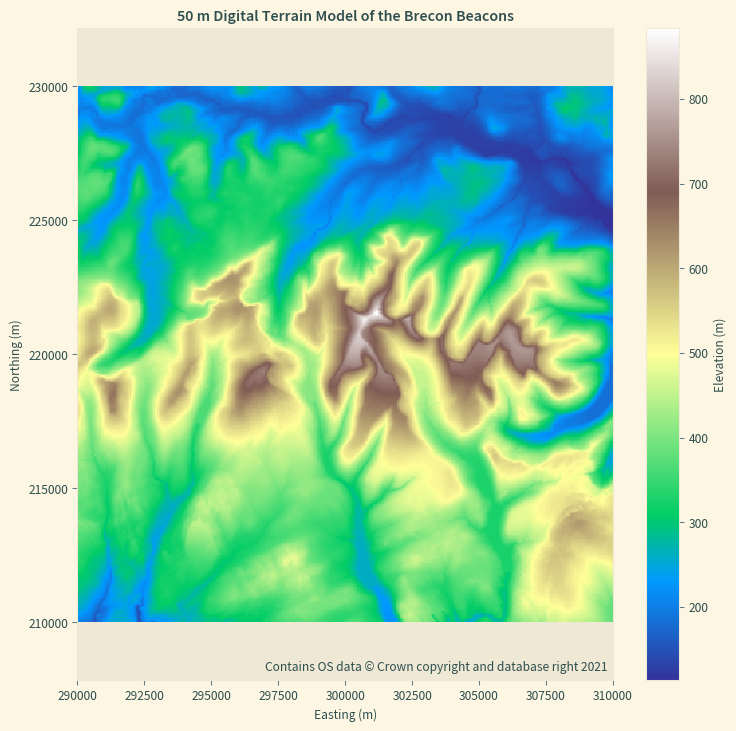

In [6]:
# plot the DTM
dtm.squeeze().plot.imshow(
    cmap="terrain",
    cbar_kwargs={"label": "Elevation (m)"},
    vmax=dtm.max(),
    vmin=dtm.min(),
    figsize=(9, 9),
)

plt.title("50 m Digital Terrain Model of the Brecon Beacons")
plt.text(
    297000,
    208200,
    "Contains OS data © Crown copyright and database right 2021",
)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.axis("equal")

plt.show()

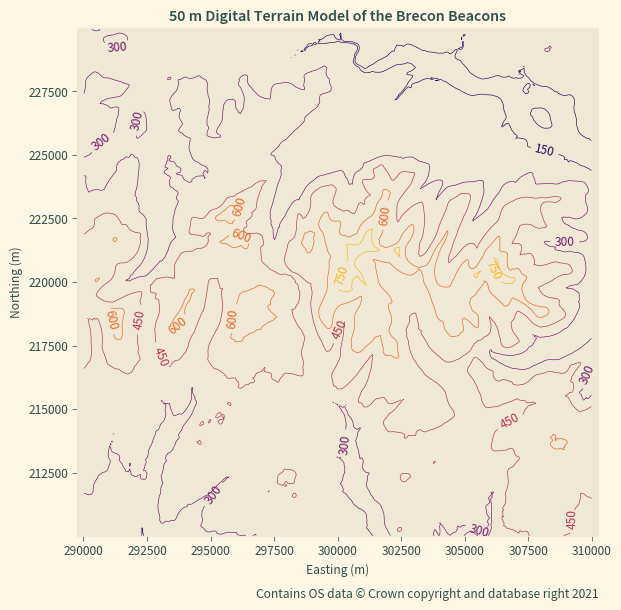

In [7]:
# plot contours
CS = dtm.squeeze().plot.contour(
    cmap="inferno", linewidths=0.5, add_colorbar=False, figsize=(7, 7)
)

plt.title("50 m Digital Terrain Model of the Brecon Beacons")
plt.text(
    296800,
    207600,
    "Contains OS data © Crown copyright and database right 2021",
)
plt.clabel(CS, inline=True)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.axis("equal")

plt.show()

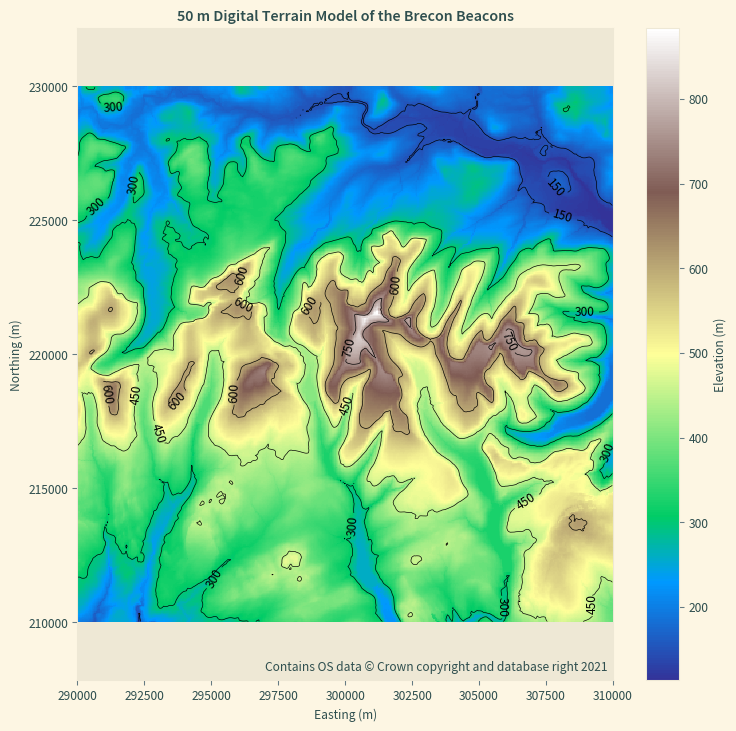

In [8]:
# contour overlay
dtm.squeeze().plot.imshow(
    cmap="terrain",
    cbar_kwargs={"label": "Elevation (m)"},
    vmax=dtm.max(),
    vmin=dtm.min(),
    figsize=(9, 9),
)

CS = dtm.squeeze().plot.contour(colors="black", linewidths=0.5)

plt.title("50 m Digital Terrain Model of the Brecon Beacons")
plt.text(
    297000,
    208200,
    "Contains OS data © Crown copyright and database right 2021",
)
plt.clabel(CS, inline=True)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.axis("equal")

plt.show()